In [ ]:
# This programme uses a neural netwrok called Long Short Term Memore (LSTM) to
# predict the closing price of a corporation (Apple Inc.) using the past 60 days stock price.


In [46]:
!pip install yfinance
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import yfinance as yf

In [47]:
df = yf.download('TSLA', start='2012-01-01', end='2024-09-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,1.929333,1.966667,1.843333,1.872000,1.872000,13921500
2012-01-04,1.880667,1.911333,1.833333,1.847333,1.847333,9451500
2012-01-05,1.850667,1.862000,1.790000,1.808000,1.808000,15082500
2012-01-06,1.813333,1.852667,1.760667,1.794000,1.794000,14794500
2012-01-09,1.800000,1.832667,1.741333,1.816667,1.816667,13455000
...,...,...,...,...,...,...
2024-08-26,218.750000,219.089996,211.009995,213.210007,213.210007,59301200
2024-08-27,213.250000,215.660004,206.940002,209.210007,209.210007,62821400
2024-08-28,209.720001,211.839996,202.589996,205.750000,205.750000,64116400


In [48]:
df.shape

(3186, 6)

Text(0, 0.5, 'Close Price USD ($)')

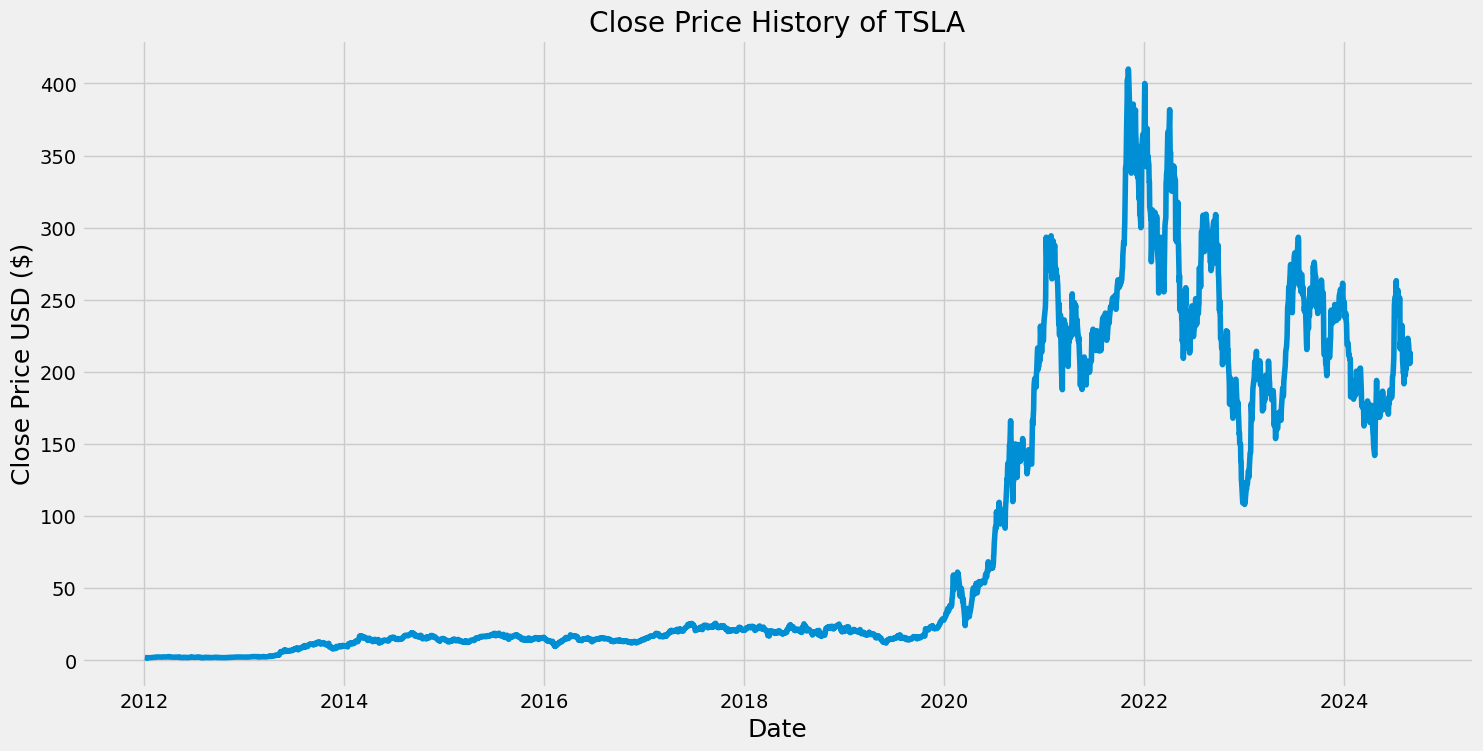

In [49]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History of TSLA')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

In [50]:
#Create a new dataframe with only the "Close" column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)
training_data_len

2549

In [51]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00086343],
       [0.00080303],
       [0.00070674],
       ...,
       [0.50001306],
       [0.50131064],
       [0.52048065]])

In [53]:

#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.00086343, 0.00080303, 0.00070674, 0.00067246, 0.00072796,
       0.00078834, 0.00088791, 0.00089117, 0.        , 0.00062186,
       0.00065614, 0.00064798, 0.00062186, 0.00064961, 0.0007557 ,
       0.00084547, 0.00100379, 0.00106745, 0.00110662, 0.00102501,
       0.00110825, 0.00121761, 0.00136451, 0.0014706 , 0.00143796,
       0.00149182, 0.00159791, 0.00135634, 0.00142   , 0.00169421,
       0.00176439, 0.00185906, 0.001988  , 0.00191129, 0.00186559,
       0.00191618, 0.00178887, 0.00176766, 0.00179867, 0.00173338,
       0.0018966 , 0.00183621, 0.00179214, 0.00168441, 0.00168605,
       0.00167789, 0.00195046, 0.00215775, 0.00217081, 0.00204023,
       0.0019929 , 0.00204513, 0.00198963, 0.00198637, 0.00201738,
       0.00189497, 0.00184274, 0.00238462, 0.00247276, 0.00245807])]
[0.0023731972591546557]

[array([0.00086343, 0.00080303, 0.00070674, 0.00067246, 0.00072796,
       0.00078834, 0.00088791, 0.00089117, 0.        , 0.00062186,
       0.00065614, 0.00064798, 0.

In [54]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the x_train data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2489, 60, 1)

In [55]:
#Building th LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [56]:
#After builing the model, now is time to compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [57]:
#Train the model
model.fit(x_train,y_train, batch_size=1, epochs=1)

2489/2489 ━━━━━━━━━━━━━━━━━━━━ 73s 28ms/step - loss: 0.0024


In [58]:
#Create the testing data set
#Create a new arrary containing scaled value data set from 2489 to 3186
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [59]:
x_test = np.array(x_test)
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [60]:
#Get the model predicted price values
predictions  = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [61]:
#Get the root mean squared error
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

17.693035261425837

<ipython-input-62-b9fcd08b3dff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


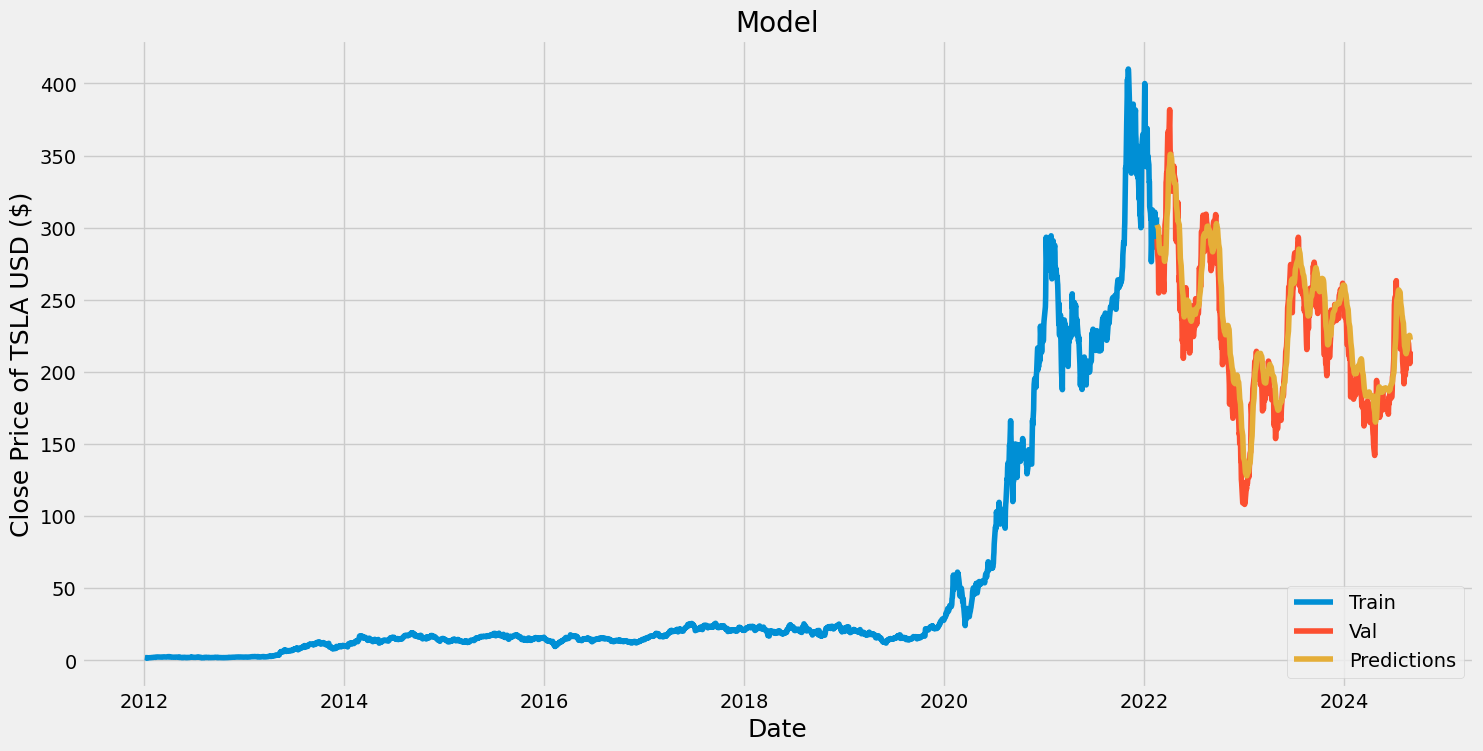

In [62]:
#Plotting and visualizing the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price of TSLA USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [63]:
#Show the acutal value and predicted prices in the form of a table
valid

,Close,Predictions
Date,,
2022-02-17,292.116669,301.981293
2022-02-18,285.660004,301.366119
2022-02-22,273.843323,299.684784
2022-02-23,254.679993,296.536926
2022-02-24,266.923340,291.197144
...,...,...
2024-08-26,213.210007,225.039490
2024-08-27,209.210007,225.321396
2024-08-28,205.750000,224.799271


In [64]:
# Get the closing price for "TSLA" in the future
tsla_quote=yf.download('TSLA', start = '2012-01-01', end = '2024-09-01')
#Create a new dataframe
new_df = tsla_quote.filter(['Close'])
#Get the last 60 days closing price and convert it into an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the last 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data into 3-dimensional
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[221.66809]]


In [86]:
#Get the actual price for 'TSLA' on 2024-09-03 since which is the next trading day
tsla_quote_2=yf.download('TSLA', start = '2024-09-03', end = '2024-09-04')
print((tsla_quote_2)['Close'])

[*********************100%***********************]  1 of 1 completed

Date
2024-09-03    210.600006
Name: Close, dtype: float64
